In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import datetime as dt
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("telecom_churn.csv")

In [157]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [158]:
df.shape

(7043, 21)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [160]:
# Total Charges Have  diferent data type ie object it should be float so cheking those value 
df['TotalCharges'].value_counts()


20.2       11
           11
19.75       9
19.9        8
19.65       8
           ..
444.75      1
3720.35     1
1517.5      1
3128.8      1
5893.15     1
Name: TotalCharges, Length: 6531, dtype: int64

First line contain blank spaces so we have to take care of it we will  convert it into null value.


In [161]:
# replace the space with NAN value 

df['TotalCharges'].replace(' ',np.nan,inplace=True)
#convert to float 
df['TotalCharges']=df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [162]:
# fill null value with mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)
#df['TotalCharges'].isnull().sum()


In [163]:
df.drop('customerID' ,axis=1,inplace=True)


In [164]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [165]:
# dealing With Categorical Columns

In [166]:
df_num=df[["tenure","MonthlyCharges","TotalCharges"]]
df_cat=df.select_dtypes("object")

In [167]:
df_num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [168]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


<AxesSubplot:>

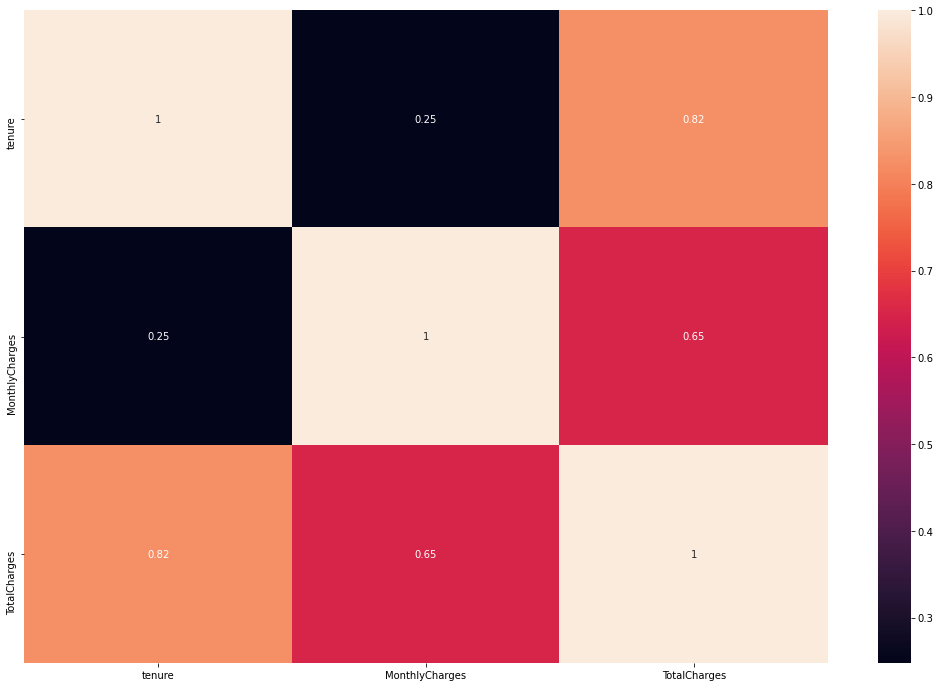

In [169]:
#check for multi colinearity 
plt.show()
plt.figure(figsize=(18,12))
sns.heatmap(df_num.corr(),annot=True)

In [170]:
#skewness 
from scipy.stats import skew

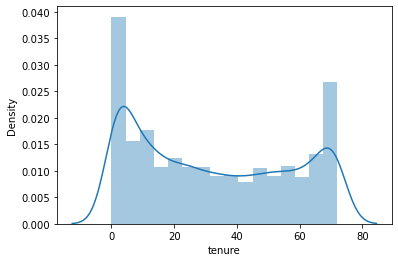

tenure 0.2394887299846216


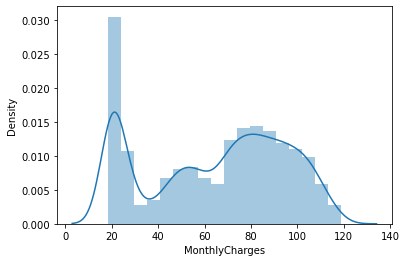

MonthlyCharges -0.2204774644391769


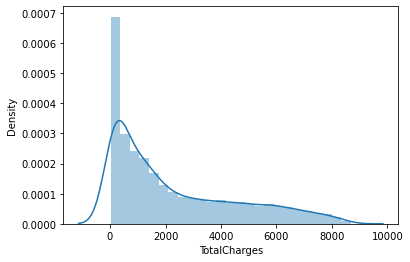

TotalCharges 0.962189042660014


In [171]:
for col in df_num:
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()
    print(col, skew(df_num[col]))


In [172]:
#removing skewness
for col in df_num:
  if skew(df_num[col]) >= 0.5 or skew(df_num[col]) <= -0.5:
    df_num[col] = np.log(df_num[col])
    

In [173]:
for col in df_num:
  print(col, skew(df_num[col]))

tenure 0.2394887299846216
MonthlyCharges -0.2204774644391769
TotalCharges -0.7557286307407359


In [174]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [175]:
df_cat.head()


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [176]:
df_new = pd.concat([df_num,df_cat,df["SeniorCitizen"]],axis=1)


In [177]:
df_new

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,1,29.85,3.396185,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,34,56.95,7.544068,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0
2,2,53.85,4.683519,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
3,45,42.30,7.517928,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0
4,2,70.70,5.021575,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,7.596141,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,0
7039,72,103.20,8.904209,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,0
7040,11,29.60,5.847739,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,0
7041,4,74.40,5.725544,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,1


0    5174
1    1869
Name: Churn, dtype: int64
---------------------------------------------------


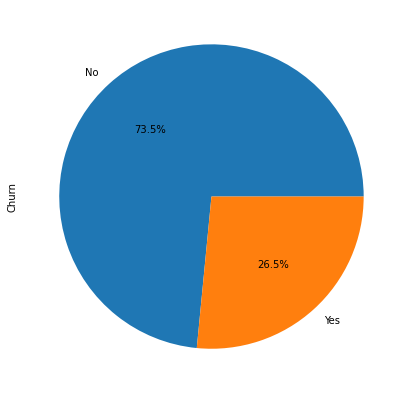

The Data set is Highly Imbalanced


In [178]:
#
print(df_new["Churn"].value_counts())
print("---------------------------------------------------")
plt.figure(figsize=(7,7))
df["Churn"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()
print("The Data set is Highly Imbalanced")

In [179]:
X = df_new.drop("Churn",axis=1)
y = df_new["Churn"]

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [181]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [182]:
y_pred = lr.predict(X_test)


In [183]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.65      0.57      0.61       528

    accuracy                           0.82      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.81      0.82      0.81      2113



In [184]:
dt = tree.DecisionTreeClassifier()


In [185]:
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [186]:
y_pred = dt.predict(X_test)


In [187]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1585
           1       0.47      0.49      0.48       528

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.74      0.73      0.74      2113



In [188]:
dt2 = tree.DecisionTreeClassifier(max_depth=4)


In [189]:
dt2.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

In [190]:
y_pred = dt2.predict(X_test)


In [191]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1585
           1       0.56      0.70      0.62       528

    accuracy                           0.79      2113
   macro avg       0.72      0.76      0.74      2113
weighted avg       0.81      0.79      0.79      2113



In [192]:
rf = RandomForestClassifier(max_depth=8)


In [193]:
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=8)

In [194]:
y_pred = rf.predict(X_test)


In [195]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.65      0.55      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



In [196]:
d=pd.read_csv('telecom_churn.csv')

In [197]:
d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [198]:
d['tenure'].sum()

227990

In [199]:
f=pd.read_csv('Customer churn')

In [200]:
f.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [201]:
f['tenure'].sum()

227990